In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [14, 10]
sns.set(rc = {'figure.figsize':(14, 10)})

In [2]:
df = pd.read_csv(r'C:\Users\vinem\OneDrive\Рабочий стол\Diabetes Classification.csv')
df.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40,High,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20,Normal,80,5.0,No,No,Healthy,Regular,No


In [3]:
#Age: The patient's age, in years.
#Gender: The patient's gender, male or female.
#BMI: The patient's body mass index (BMI), a measure of weight relative to height.
#Blood pressure: The patient's blood pressure, in mmHg.
#FBS: The patient's fasting blood sugar, in mg/dL.
#HbA1c: The patient's hemoglobin A1c, a measure of blood sugar control over the past 3 months.
#Family history of diabetes: Whether the patient has a family history of diabetes.
#Smoking: Whether the patient smokes.
#Diet: Whether the patient has a poor or healthy diet.
#Exercise: Whether the patient exercises regularly.
#Diagnosis: The patient's diagnosis, either diabetes or no diabetes

I will now tidy up the data, i.e. missing values, outliers etc.

In [4]:
df.isnull().sum()

Age                           0
Gender                        0
BMI                           0
Blood Pressure                0
FBS                           0
HbA1c                         0
Family History of Diabetes    0
Smoking                       0
Diet                          0
Exercise                      0
Diagnosis                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         128 non-null    int64  
 1   Gender                      128 non-null    object 
 2   BMI                         128 non-null    int64  
 3   Blood Pressure              128 non-null    object 
 4   FBS                         128 non-null    int64  
 5   HbA1c                       128 non-null    float64
 6   Family History of Diabetes  128 non-null    object 
 7   Smoking                     128 non-null    object 
 8   Diet                        128 non-null    object 
 9   Exercise                    128 non-null    object 
 10  Diagnosis                   128 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.1+ KB


Text data needs to be converted into numerical data, so I will use get_dummies

In [6]:
df = pd.get_dummies(df)
df

,Age,BMI,FBS,HbA1c,Gender_Female,Gender_Male,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Family History of Diabetes_No,Family History of Diabetes_Yes,Smoking_No,Smoking_Yes,Diet_Healthy,Diet_Poor,Exercise_No,Exercise_Regular,Diagnosis_No,Diagnosis_Yes
0,45,25,100,5.7,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0
1,55,30,120,6.4,1,0,1,0,0,0,1,0,1,0,1,1,0,0,1
2,65,35,140,7.1,0,1,1,0,0,0,1,0,1,0,1,1,0,0,1
3,75,40,160,7.8,1,0,1,0,0,0,1,0,1,0,1,1,0,0,1
4,40,20,80,5.0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,17,15,100,5.7,1,0,0,0,1,1,0,0,1,0,1,1,0,0,1
124,22,19,120,6.4,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1
125,27,24,140,7.1,1,0,1,0,0,1,0,0,1,0,1,1,0,0,1
126,32,29,160,7.8,0,1,1,0,0,1,0,0,1,0,1,1,0,0,1


Afterwards, I will delete the repeating columns, and rename them 

In [7]:
df = df.drop(columns = {'Gender_Male', 'Family History of Diabetes_Yes', 'Smoking_Yes',
                        'Exercise_Regular', 'Diagnosis_Yes', 'Blood Pressure_Low', 'Diet_Poor', 'Blood Pressure_Normal'})

In [8]:
df = df.rename(columns = {'Gender_Female': 'Gender', 
                    'Blood Pressure_High': 'Blood Pressure',
                    'Family History of Diabetes_No': 'Family History of Diabetes',
                    'Smoking_No': 'Smoking',
                    'Diet_Healthy': 'Diet', 
                    'Exercise_No': 'Exercise',
                    'Diagnosis_No': 'Diagnosis'})

And now continue to do a little data analysis

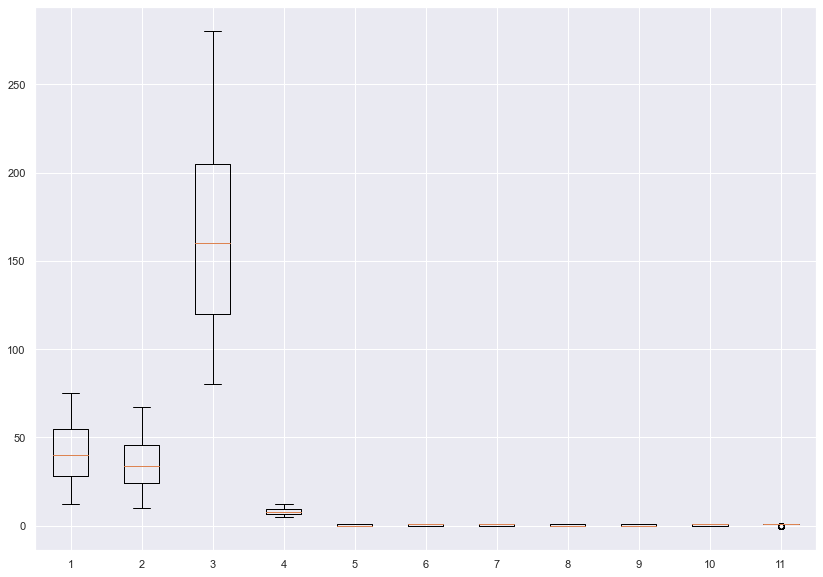

In [9]:
plt.boxplot(df)
plt.show()

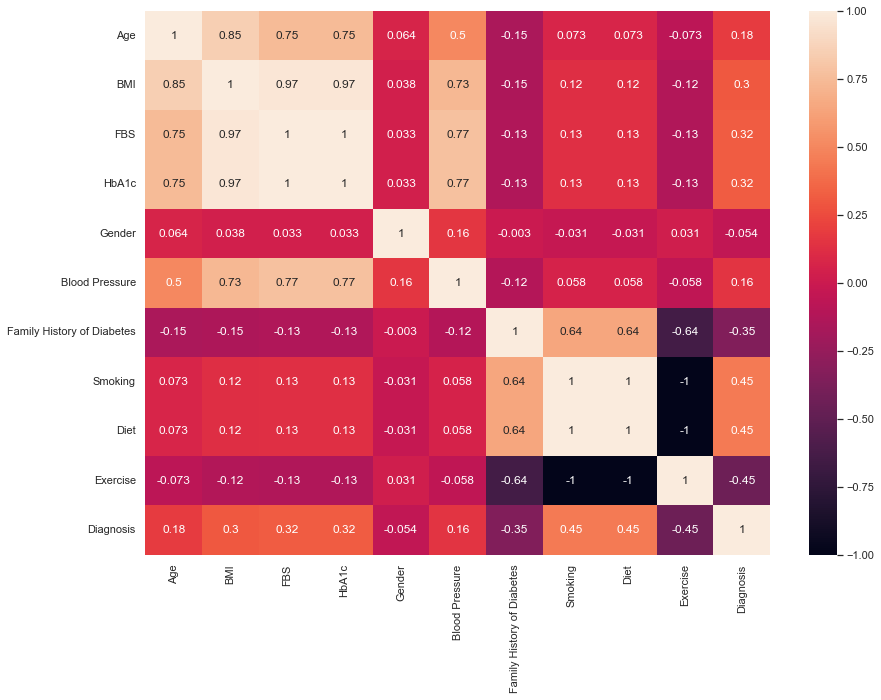

In [10]:
sns.heatmap(df.corr(), annot = True)
plt.show()

You should select columns where the correlation is in the range 0.49 to 0.99

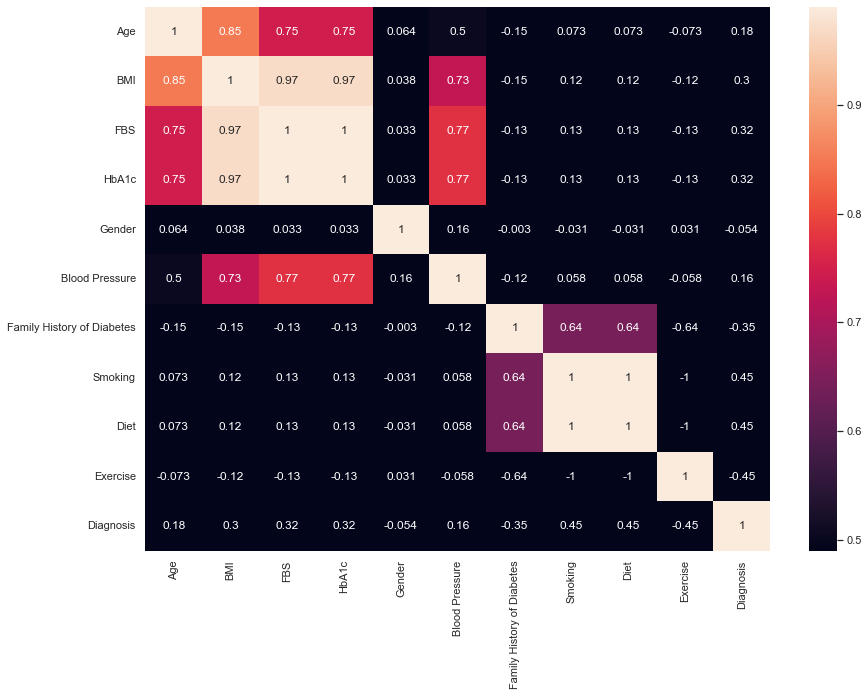

In [11]:
sns.heatmap(df.corr(), annot = True, vmin = 0.49, vmax = 0.99)
plt.show()

We have 2 variables that are not at all correlated with each other (Smoking and Diet).
And then there are at least 5 variables that show a good correlation.
Next, we look at the correlated data in the graph.

In [12]:
def plot(data, x, y):    
    sns.lmplot(x, y, data = data, robust = True)

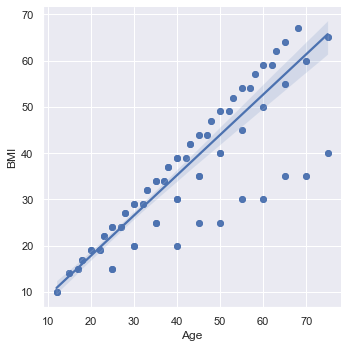

In [13]:
plot(df, 'Age', 'BMI')

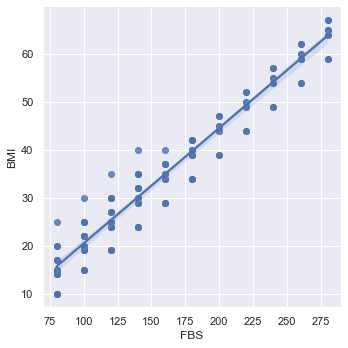

In [14]:
plot(df, 'FBS', 'BMI')

These two graphs show one of the strongest dependencies 

Then look at the overall status of all data

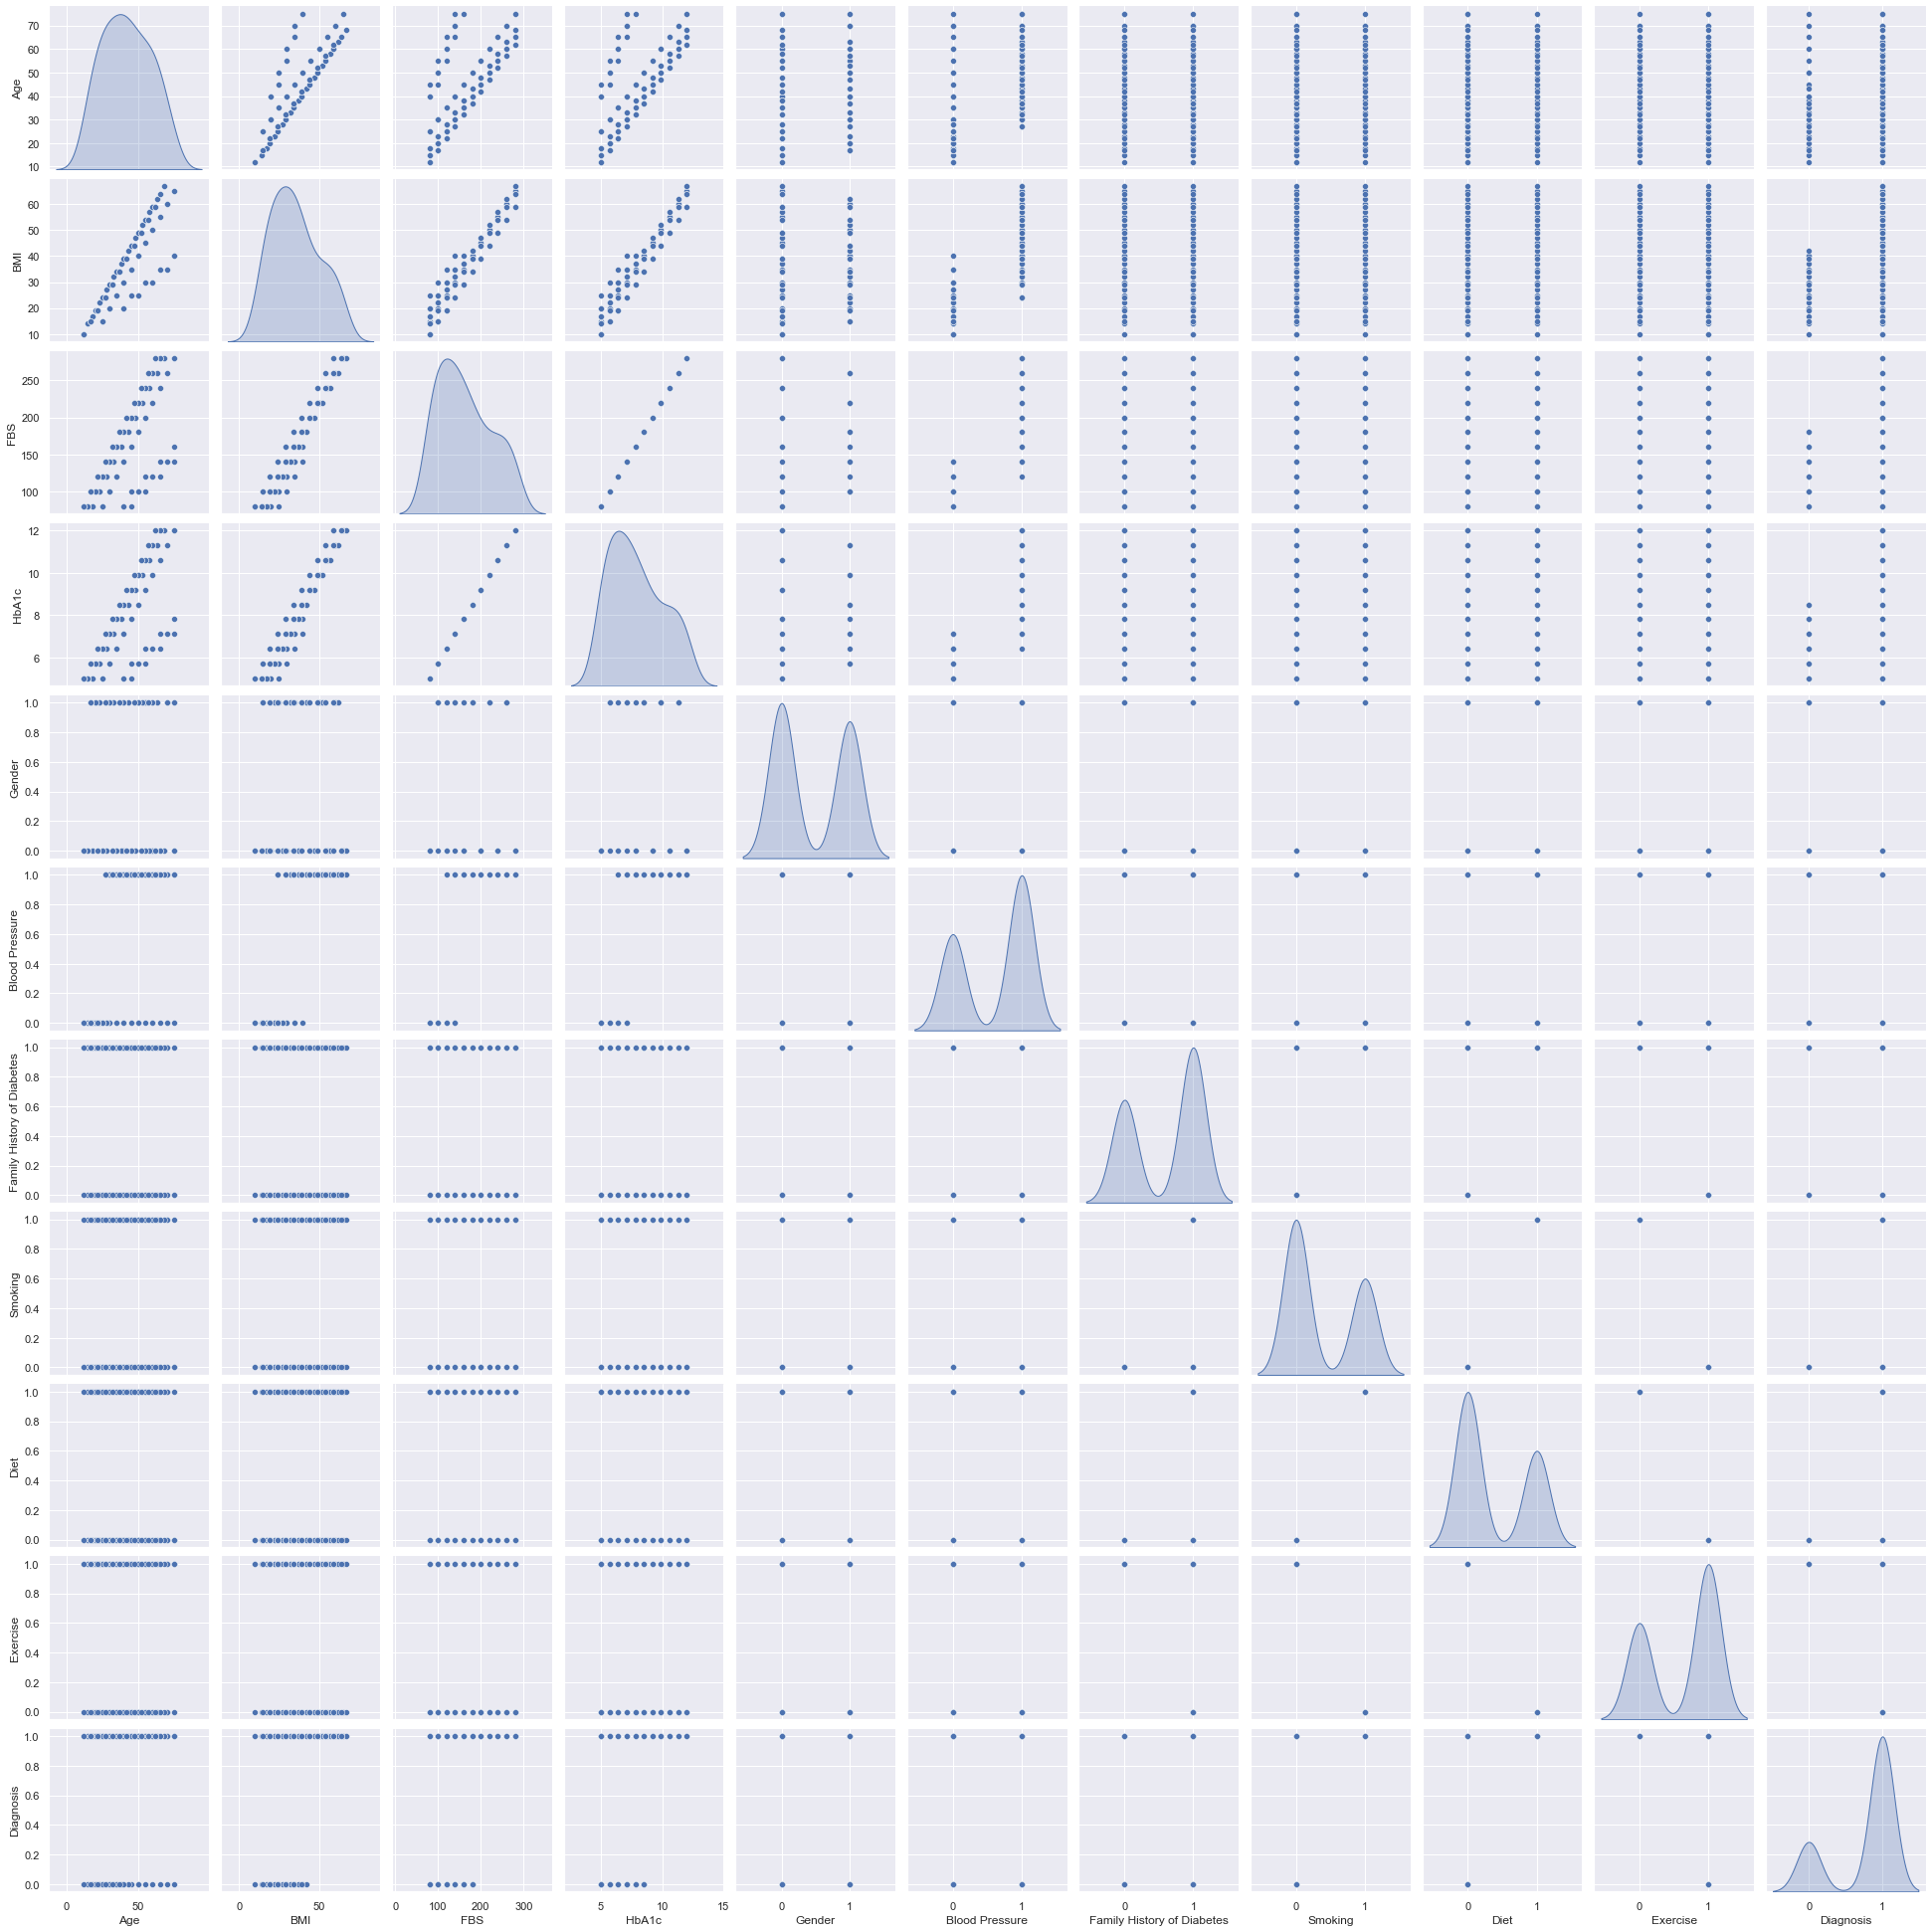

In [15]:
sns.pairplot(df, kind = 'scatter', diag_kind = 'kde')
plt.show()

And finally let's get down to teaching the model itself

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

I will prepare the data, generate the X and Y, and train the model.
Today I will use KNN and SVC

In [17]:
X = df.drop(columns = 'Diagnosis')
y = df['Diagnosis']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
sd = StandardScaler()
X_train = sd.fit_transform(X_train)
X_test = sd.transform(X_test)

In [20]:
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Evaluation time!')
print(confusion_matrix(y_pred, y_test))
print('-'*25)
print(classification_report(y_pred, y_test))

df_knn = pd.DataFrame({
'y_pred': y_pred,
'y_test': y_test
})
df_knn.head()

Evaluation time!
[[ 6  1]
 [ 0 19]]
-------------------------
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.95      1.00      0.97        19

    accuracy                           0.96        26
   macro avg       0.97      0.93      0.95        26
weighted avg       0.96      0.96      0.96        26



,y_pred,y_test
55,1,1
40,0,0
19,1,1
31,1,1
98,0,0


And here we are with a score of 96% and that's very good

In [21]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print('Evaluation time!')
print(confusion_matrix(y_pred_svc, y_test))
print('-'*25)
print(classification_report(y_pred_svc, y_test))

df_svc = pd.DataFrame({
'y_pred': y_pred_svc,
'y_test': y_test
})
df_svc.head()

Evaluation time!
[[ 6  0]
 [ 0 20]]
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        20

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



,y_pred,y_test
55,1,1
40,0,0
19,1,1
31,1,1
98,0,0


Now that's it, you've got a well-trained model